Read the Excel and export edge list


In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

# Load data
df = pd.read_excel("Transfer-Players-Clubs.xlsx")

# Create a directed graph 
G = nx.MultiDiGraph()

# Add nodes from 'from' and 'to' club columns
for _, row in df.iterrows():
    G.add_node(row['from_club_id'], club_id=row['from_club_id'], club_name=row['from_club_name'])
    G.add_node(row['to_club_id'], club_id=row['to_club_id'], club_name=row['to_club_name'])

# Add edges 
for _, row in df.iterrows():
    G.add_edge(row['from_club_id'], row['to_club_id'], player_name=row['player_name'], transfer_fee=row['transfer_fee'])

# Export edge list 
with open('football_transfers_edge_list.txt', 'w') as f:
    for u, v, data in G.edges(data=True):
        f.write(f"{u} {v}\n")

# Number of nodes and edges
N = len(G)  # Number of nodes
L = G.size()  # Number of edges (accounting for multi-edges)

# Calculate degree information
degrees = [G.degree(node) for node in G]  # Get degree of each node
in_degrees = [G.in_degree(node) for node in G]  # Get in-degree of each node
out_degrees = [G.out_degree(node) for node in G]  # Get out-degree of each node

# Find min and max degrees
kmin = min(degrees)
kmax = max(degrees)

# Calculate the average degree
avg_degree = 2 * L / N 
avg_degree_alt = np.mean(degrees)  

# Print results
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", avg_degree)
print("Average degree (alternate calculation)", avg_degree_alt)
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)


Number of nodes:  3139
Number of edges:  36392

Average degree:  23.187002230009558
Average degree (alternate calculation) 23.187002230009558

Minimum degree:  1
Maximum degree:  532


Read the Edge List



In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Read in an edge list from the file 'football_transfers_edge_list.txt'
G = nx.read_edgelist('football_transfers_edge_list.txt', comments='#',
                     create_using=nx.MultiDiGraph(),  # Use MultiDiGraph for multiple edges between nodes
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')



Create a Graph File

In [47]:
import pandas as pd
import networkx as nx

# Load data
df = pd.read_excel("Transfer-Players-Clubs.xlsx")

# Create a directed graph that allows multi-edges (multiple transfers)
G = nx.MultiDiGraph()

# Add nodes from 'from' and 'to' club columns with attributes
for _, row in df.iterrows():
    G.add_node(row['from_club_id'], club_id=row['from_club_id'], club_name=row['from_club_name'])
    G.add_node(row['to_club_id'], club_id=row['to_club_id'], club_name=row['to_club_name'])

# Add edges with attributes (allowing multiple transfers between the same clubs)
for _, row in df.iterrows():
    G.add_edge(
        row['from_club_id'],
        row['to_club_id'],
        player_name=row['player_name'],
        transfer_fee=row['transfer_fee']
    )

# Export to GEXF for Gephi
nx.write_gexf(G, "football_transfers_network.gexf")


In [52]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  3139
Number of edges:  36392

Average degree:  23.187002230009558
Average degree (alternate calculation) 23.187002230009558

Minimum degree:  1
Maximum degree:  532


In [53]:
import pandas as pd
import networkx as nx

# Load your data and create the graph as before
df = pd.read_excel("Transfer-Players-Clubs.xlsx")

# Create a directed multigraph to allow multiple edges between the same clubs
G = nx.MultiDiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_edge(row['from_club_id'], row['to_club_id'], player_name=row['player_name'], transfer_fee=row['transfer_fee'])

# Calculate in-degree and out-degree for each node (club)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Create a new attribute to categorize nodes
degree_category = {}
for node in G.nodes():
    in_deg = in_degree.get(node, 0)
    out_deg = out_degree.get(node, 0)
    if in_deg > 0 and out_deg == 0:
        degree_category[node] = "Only In-Degree"
    elif in_deg == 0 and out_deg > 0:
        degree_category[node] = "Only Out-Degree"
    elif in_deg > 0 and out_deg > 0:
        degree_category[node] = "Both"
    else:
        degree_category[node] = "None"

# Add the category to the graph nodes as an attribute
nx.set_node_attributes(G, degree_category, 'degree_category')

# Export the graph with the new degree_category column to Gephi (as GEXF or CSV)
nx.write_gexf(G, "football_transfer_network_with_categories.gexf")


Plotting the degree distribution

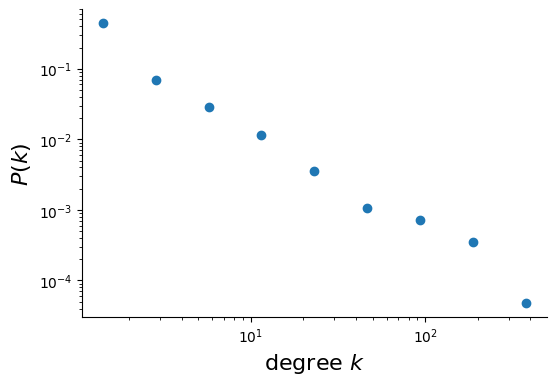

In [54]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [56]:
import networkx as nx

# Read the graph from the edge list
G = nx.read_edgelist('football_transfers_edge_list.txt', comments='#',
                     create_using=nx.MultiDiGraph(),  # Use MultiDiGraph for multiple edges
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Number of connected components (strongly connected components)
num_components = nx.number_strongly_connected_components(G)
print(f"Number of strongly connected components: {num_components}")



# Average Path Length (only for strongly connected components)
# Ensure that the graph is strongly connected
if nx.is_strongly_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average path length: {avg_path_length}")
else:
    print("Graph is not strongly connected, average path length cannot be calculated.")



Number of nodes: 3139
Number of edges: 36392
Number of strongly connected components: 2705
Graph is not strongly connected, average path length cannot be calculated.


Null-Model


In [10]:
import networkx as nx

# Read in the football transfer network (unweighted, directed)
G = nx.read_edgelist("football_transfers_edge_list.txt", create_using=nx.MultiDiGraph())


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 3139
Number of edges: 36392


Convert to a simple Graph

In [11]:
import networkx as nx
import numpy as np

# Assume G is your MultiDiGraph or DiGraph
G_undirected = nx.Graph(G)

# Average Clustering Coefficient
C = nx.average_clustering(G_undirected)

# Largest Connected Component for path length
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_lcc = G_undirected.subgraph(largest_cc)
d = nx.average_shortest_path_length(G_lcc)

print("Average Clustering Coefficient:", C)
print("Average Shortest Path Length:", d)


Average Clustering Coefficient: 0.20463378419883615
Average Shortest Path Length: 3.4683653560918977


ER Degree Distribution

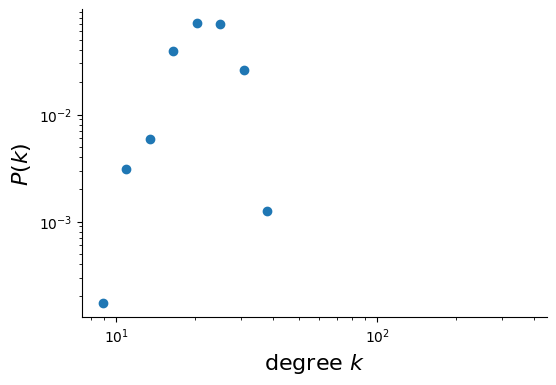

In [ ]:
# Function Defintions

# Function to plot a degree distribution graph 
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)


In [ ]:
import networkx as nx
import numpy as np

# Initialize lists to store results
clustering_ER = []
short_path_ER = []


for i in range(1000):  
    
    # Generate a random Erdos-Renyi graph
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    
    # Calculate clustering coefficient
    C_ER = np.mean(list(nx.clustering(ER).values()))
    
    # Check if the graph is connected to calculate the shortest path
    if nx.is_connected(ER):
        d_ER = nx.average_shortest_path_length(ER, weight=None)
    else:
        d_ER = None  
    
    # Store the results
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)

# Calculate mean and std for clustering coefficients and path lengths
print("Clustering Coefficient - Mean: ", np.mean(clustering_ER))
print("Clustering Coefficient - Std: ", np.std(clustering_ER))

# Filter out None values (disconnected graphs) for shortest path lengths
short_path_ER = [x for x in short_path_ER if x is not None]

print("Average Shortest Path - Mean: ", np.mean(short_path_ER))
print("Average Shortest Path - Std: ", np.std(short_path_ER))


Clustering Coefficient - Mean:  0.007381286613261546
Clustering Coefficient - Std:  0.00017267307155158657
Average Shortest Path - Mean:  2.8579110020505203
Average Shortest Path - Std:  0.002963032333190806


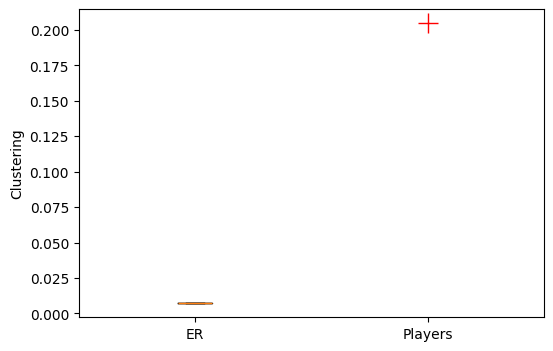

In [17]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Players'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

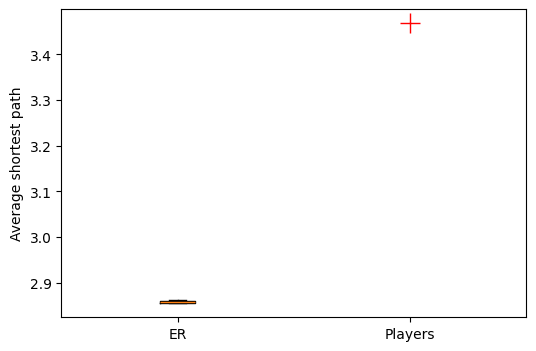

In [18]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Players'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()